# Flight Price:

## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [555]:
df=pd.read_excel(r"C:\Users\www58\OneDrive\Desktop\python\EDA\flight_price.xlsx")

In [556]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [557]:
df.shape

(10683, 11)

# Observation

## Flight price dataset has 10683 rows and 11 columns

## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

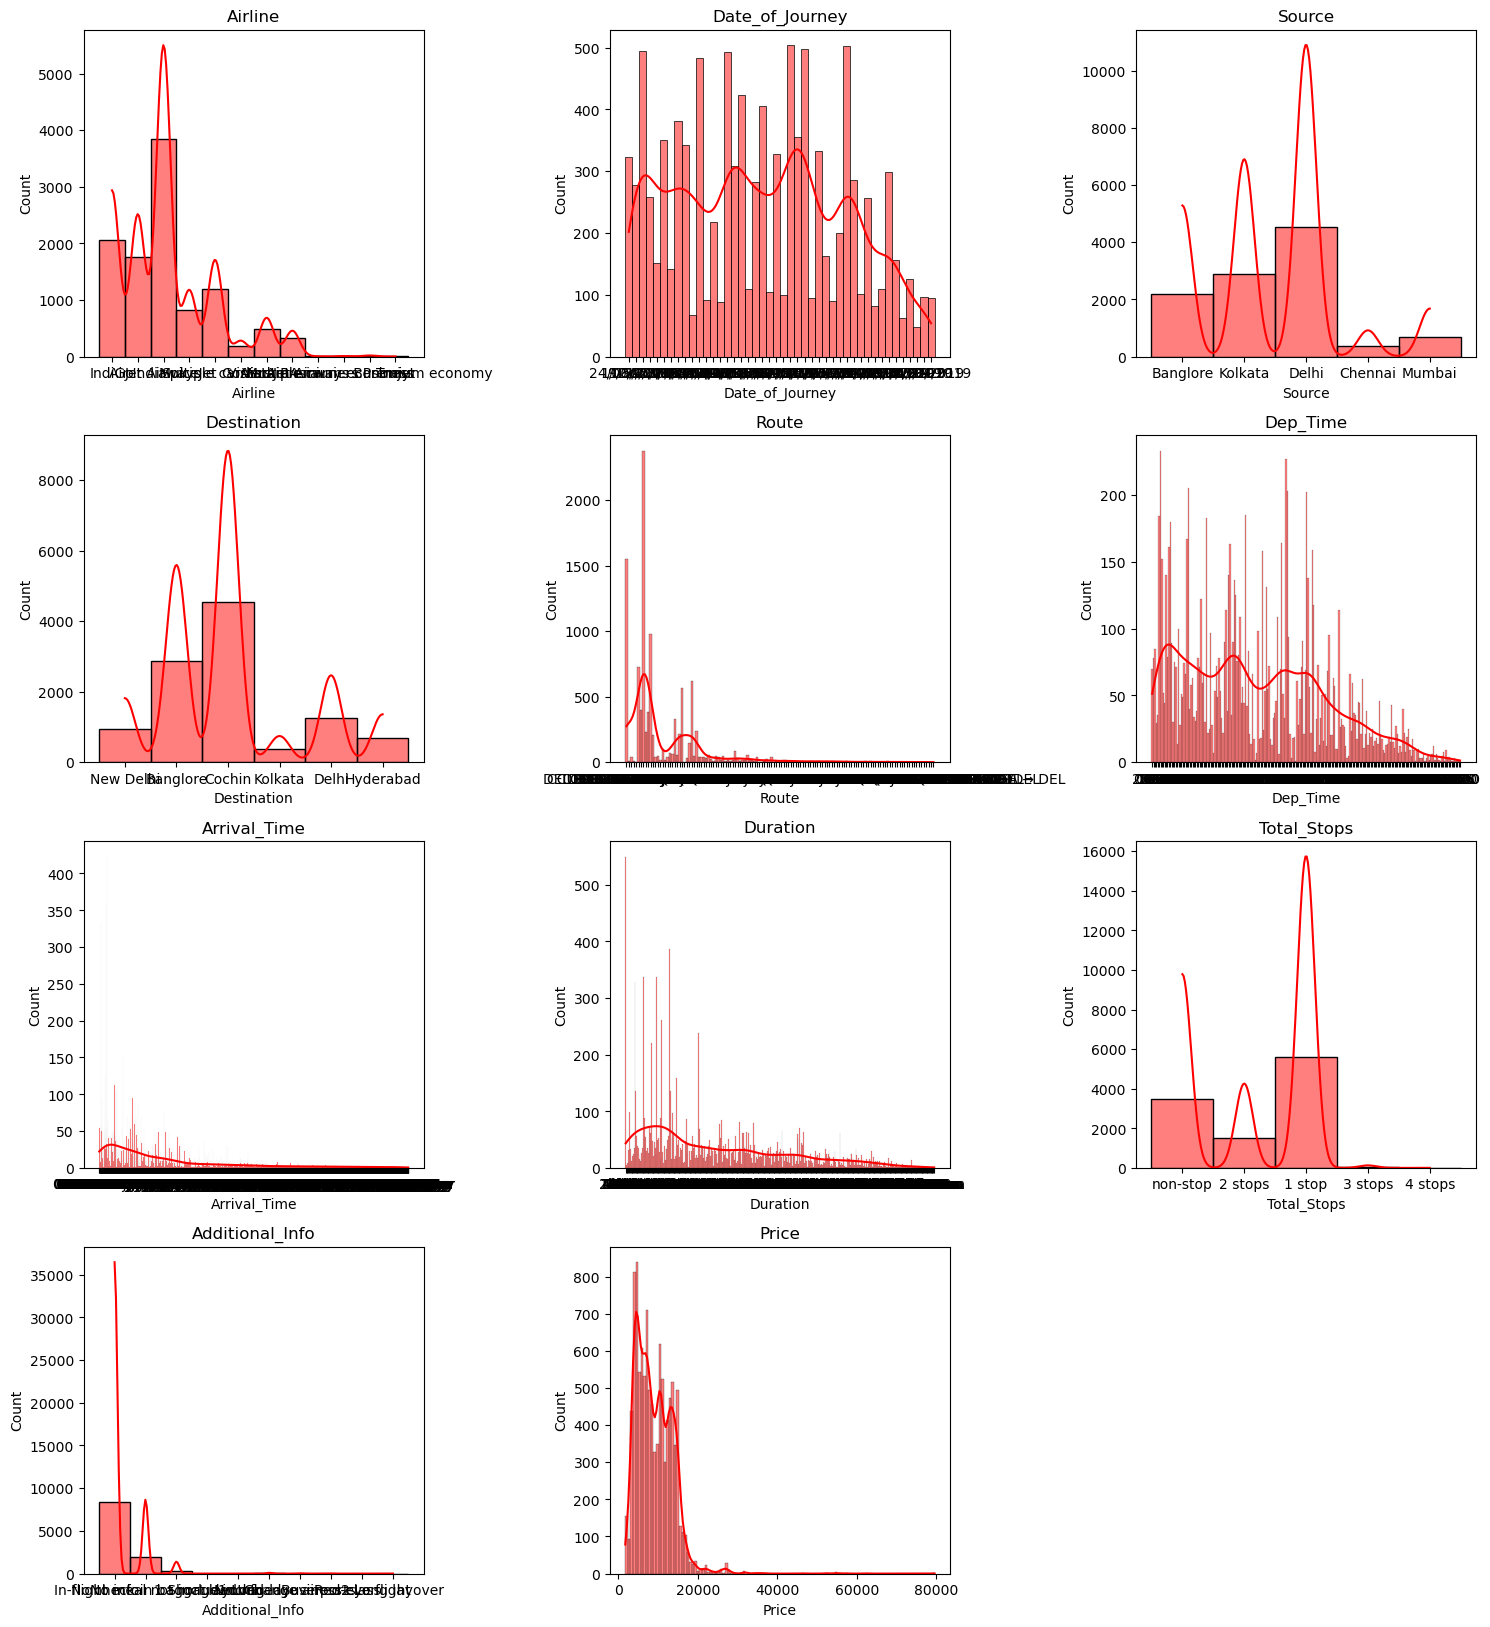

In [560]:
plt.figure(figsize=(15, 20))
for i in range(len(df.columns)):
    plt.subplot(5, 3, i + 1)  # Create a subplot for each column
    sns.histplot(df[df.columns[i]], kde=True, color='r')  
    plt.title(df.columns[i]) 
    
plt.tight_layout()
plt.show()

## Insighsts

flight price mainten's right skewds distribution


##  Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [563]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Insigest
# flight prices ranges between=(5277,12373) 
 min price= 1759 & max price=79512
    
## In this dataset their is extram value in data set or outlier which create some
problem with calculation

## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

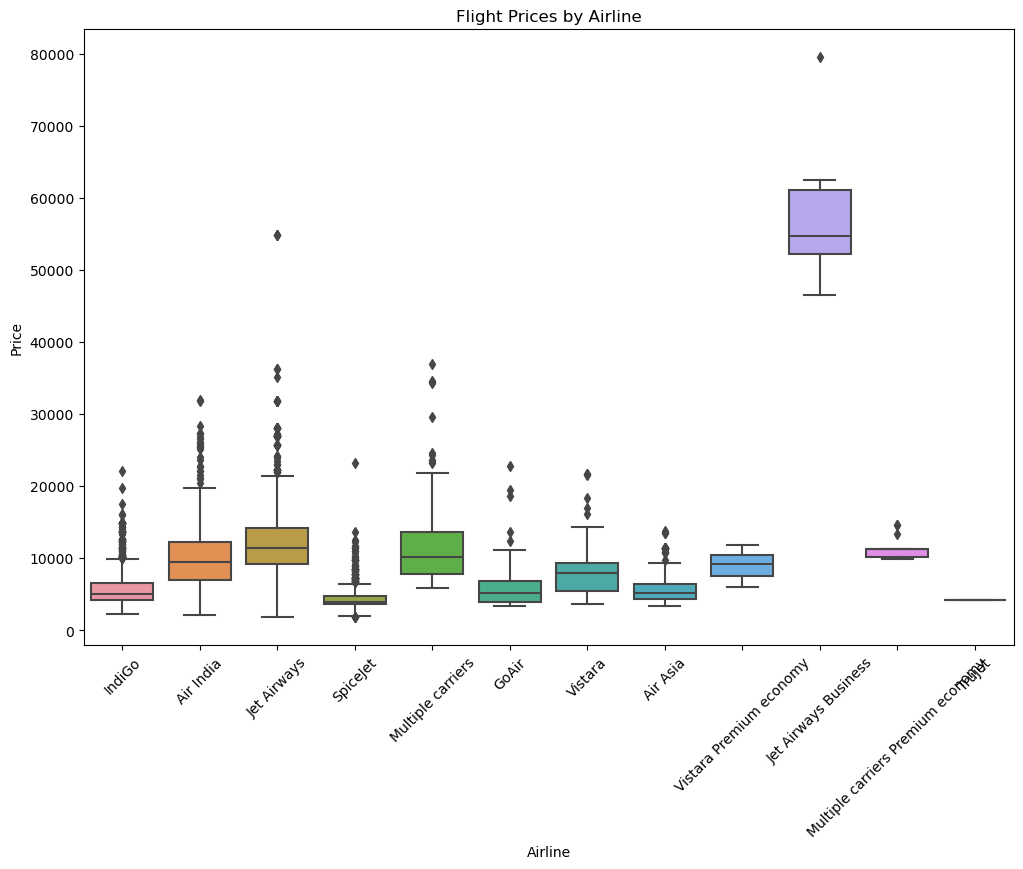

In [566]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [567]:
top_5_Airline=pd.DataFrame(df['Airline'].value_counts()[:5])

top_5_Airline.index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet'], dtype='object', name='Airline')

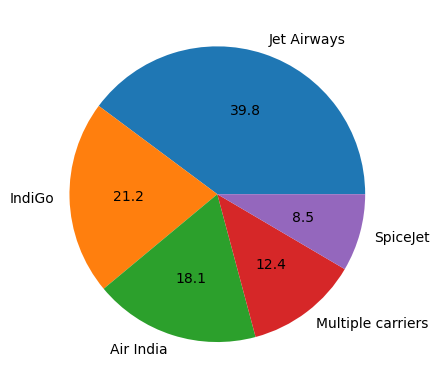

In [568]:
plt.pie(x=df['Airline'].value_counts()[:5],autopct='%1.1f',labels=top_5_Airline.index)
plt.show()

In [569]:
df[df['Airline']=='Jet Airways'].describe()

,Price
count,3849.000000
mean,11643.923357
std,4258.940578
min,1840.000000
25%,9134.000000
50%,11467.000000
75%,14151.000000
max,54826.000000


In [570]:
grouped_data = df.groupby('Airline')['Price'].agg(['mean', 'median', 'std', 'count']).reset_index()
grouped_data

,Airline,mean,median,std,count
0,Air Asia,5590.260188,5162.0,2027.362290,319
1,Air India,9611.210616,9443.0,3900.952942,1752
2,GoAir,5861.056701,5135.0,2703.585767,194
3,IndiGo,5673.682903,5000.0,2264.142168,2053
4,Jet Airways,11643.923357,11467.0,4258.940578,3849
5,Jet Airways Business,58358.666667,54747.0,11667.596748,6
6,Multiple carriers,10902.678094,10197.0,3721.234997,1196
7,Multiple carriers Premium economy,11418.846154,11269.0,1717.153936,13
8,SpiceJet,4338.284841,3873.0,1849.922514,818
9,Trujet,4140.000000,4140.0,NaN,1


## people are prefering jet airways more than other  Airlines it has cover 39% market  with mean price =11643.923357

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

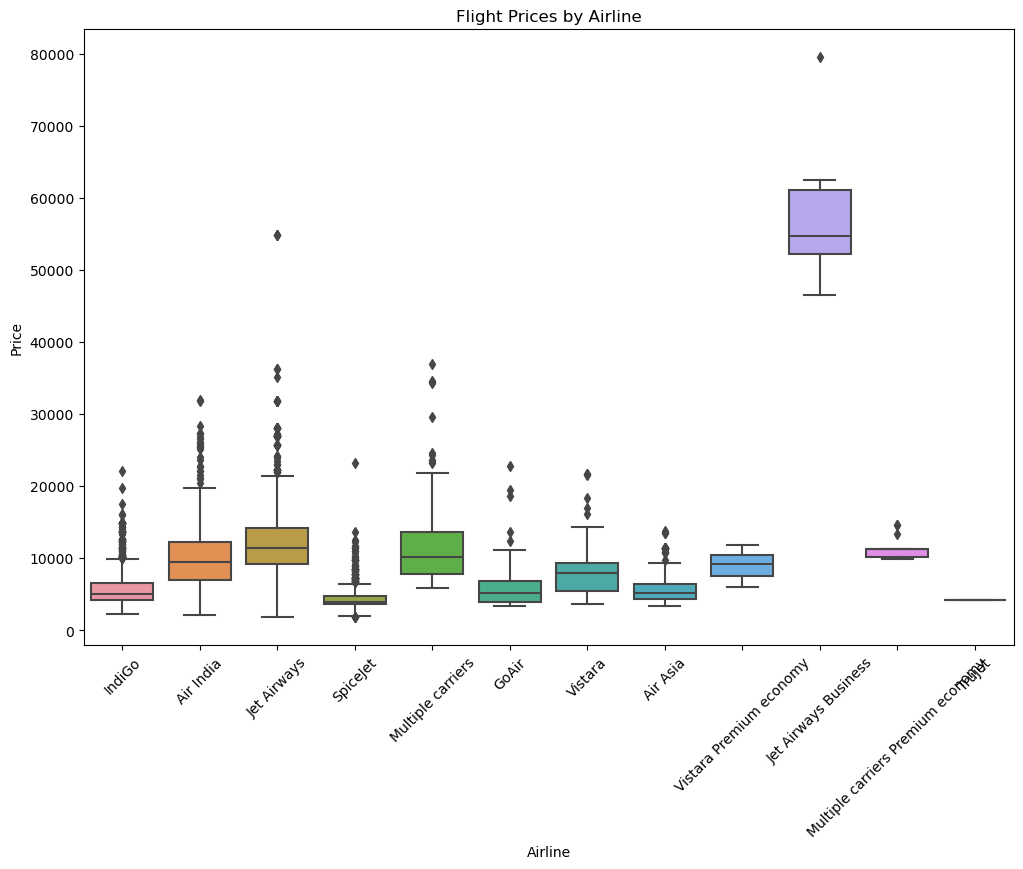

In [573]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

## in dataset their is so much outliers that gives us incorrect understanding of about price

## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
## to identify the peak travel season. What features would you analyze to ## identify the peak season, and how
## would you present your findings to your boss?

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [577]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0].astype(int)

In [578]:
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)

In [579]:
df['year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [580]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [581]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month',
       'year'],
      dtype='object')

In [582]:
df.Month.value_counts()

Month
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64

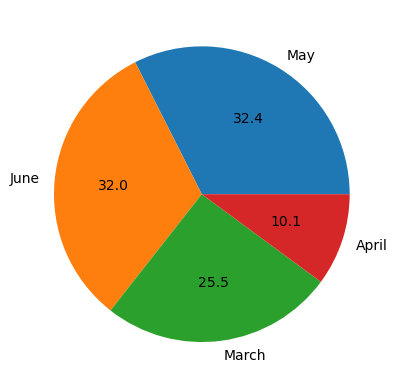

In [583]:
plt.pie(x=df.Month.value_counts(),autopct='%1.1f',labels=['May','June','March','April'])
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

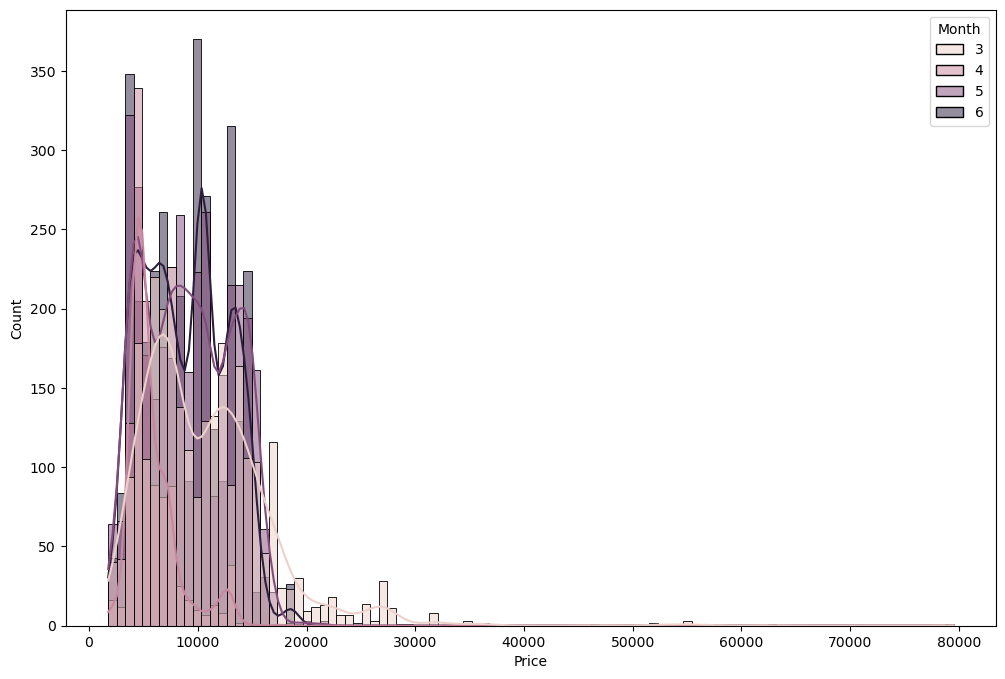

In [584]:
plt.figure(figsize=(12, 8))
sns.histplot(x=df.Price,bins=100,color='r',kde=True,hue=df['Month'])

## people are prafaring to travel in May,June And they spend so much money on traviling

In Aug flight prices are gating hike and april price are low and peoples are not not traviling flight in april

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these
## trends, and what visualizations would you use to present your findings to your team?

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [588]:
df['year'].value_counts()

year
2019    10683
Name: count, dtype: int64

# Observatipon

in peak summar April people are not traviling in flights

After winter flight prices are gatting low and people are travaling more

In [590]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [592]:
df.Duration.describe(include='object')

count      10683
unique       368
top       2h 50m
freq         550
Name: Duration, dtype: object

In [593]:
df['Dep_Hour']=df.Dep_Time.str.split(':').str[0].astype(int)

In [594]:
df['Dep_Min']=df.Dep_Time.str.split(':').str[1].astype(int)

<Axes: xlabel='Dep_Hour', ylabel='Price'>

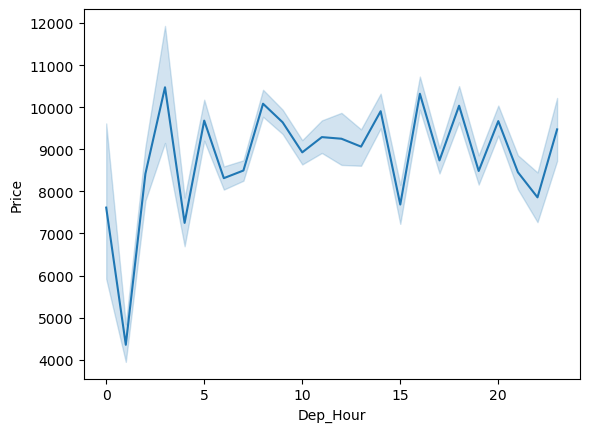

In [595]:
sns.lineplot(x=df.Dep_Hour,y=df.Price)

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
## identify these factors, and how would you present your findings to the management team?

In [597]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [598]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: xlabel='Dep_Hour', ylabel='Price'>

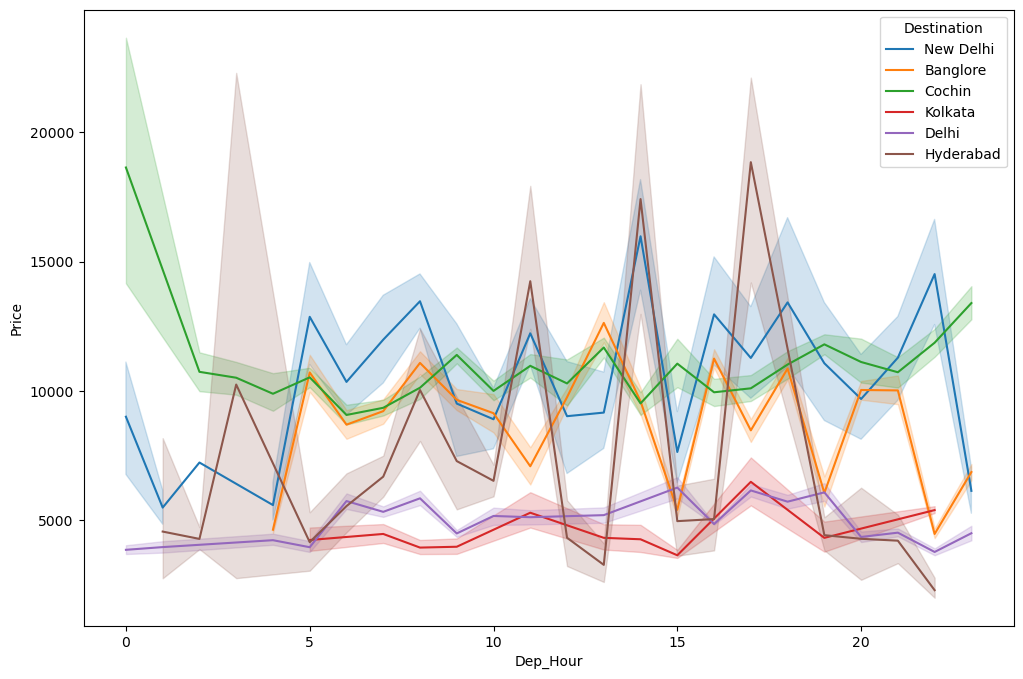

In [599]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=df.Dep_Hour,y=df.Price,hue=df.Destination)

<Axes: xlabel='Total_Stops', ylabel='Price'>

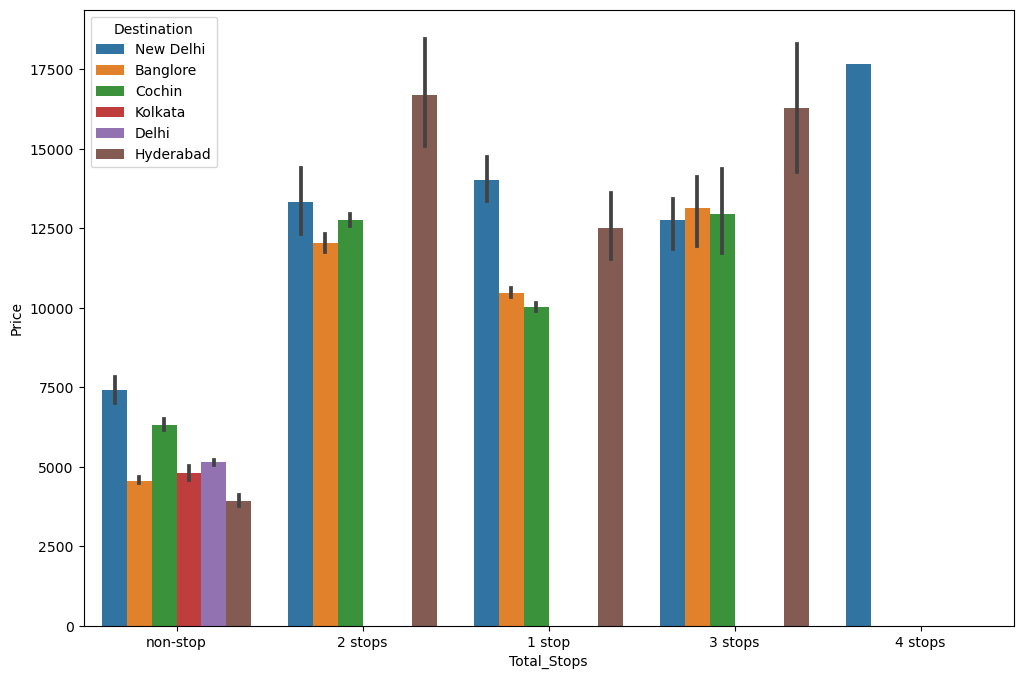

In [600]:
plt.figure(figsize=(12, 8))
sns.barplot(y=df.Price,x=df.Total_Stops,hue=df.Destination)

In [620]:
plt.figure(figsize=(12, 8))
df['Price'].plot().pie(df.Dep_Hour)
plt.show()


KeyboardInterrupt



In [ ]:
df.Destination

In [ ]:
sns.barplot(y=df.Price,x=df.Destination,color='g',)

## observatuion

New Delhi price are high and kolkata low

cochin price allways above 10000 an kolkata Delhi price are stable range under 7000 
after 4 am New Delhi price incresess to 10000 for all day

Non stop flight price chep than  2stop flight by duoble

# Google Playstore:

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [648]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [649]:
df.shape

(10841, 13)

## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [652]:
df.Rating.nunique()
## rating of apps vary by category 40

40

In [653]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [654]:
df['Type']=df['Type'].map({'Free':0, 'Paid':1, 'nan':np.nan})

In [655]:
df=df.copy()

In [656]:

df['Content Rating']=df['Content Rating'].map({'Everyone':1, 'Teen': 9, 'Everyone 10+':10, 'Mature 17+':17,'Adults only 18+':18, 'Unrated':0, 'nan':np.nan})

In [657]:
df[df['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",0.0,0,1.0,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",0.0,0,1.0,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",0.0,0,1.0,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",0.0,0,1.0,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",0.0,0,1.0,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",0.0,0,1.0,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",0.0,0,1.0,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",0.0,0,17.0,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",0.0,0,17.0,Social,"March 23, 2018",Varies with device,Varies with device


In [658]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [659]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [660]:
df['Installs']=df.Installs.str.replace(',','')
df['Installs']=df.Installs.str.replace('+','')


In [661]:
df['Installs']=df.Installs.replace('Free','0')

In [662]:
df.Installs=df.Installs.astype(int)

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  int32  
 6   Type            10839 non-null  float64
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  float64
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.0+ MB


<Axes: >

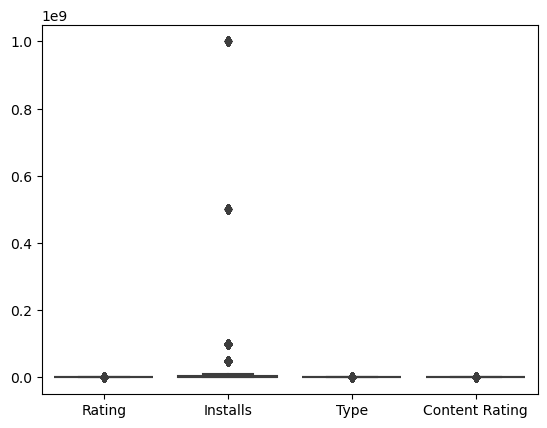

In [664]:
sns.boxplot(df)

## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [666]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 2
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [668]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [669]:
df['Size']=df.Size.str.replace('Varies with device','0')
df['Size']=df.Size.str.replace('M','000')
df['Size']=df.Size.str.replace('k','')
df['Size']=df.Size.str.replace('+','')
df['Size']=df.Size.str.replace(',','')

df['Size']=df.Size.astype(float)

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int32  
 6   Type            10839 non-null  float64
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  float64
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int32(1), object(8)
memory usage: 1.0+ MB


<Axes: xlabel='Size', ylabel='Rating'>

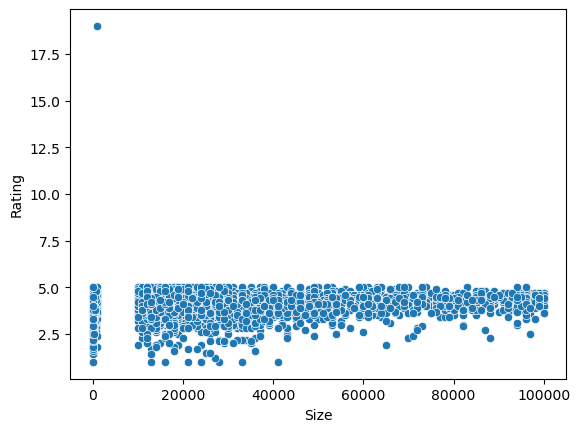

In [671]:
sns.scatterplot(y=df.Rating,x=df.Size)

<Axes: xlabel='Rating', ylabel='Size'>

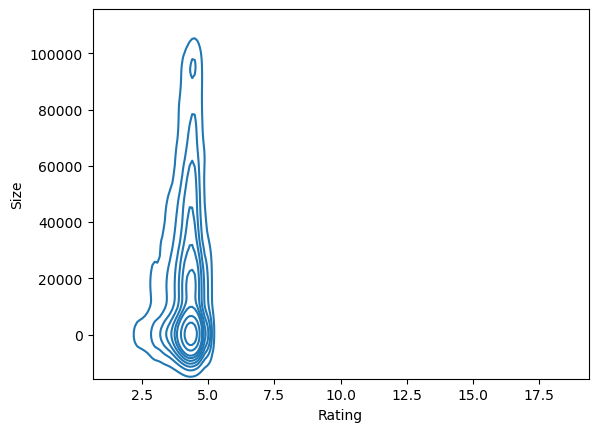

In [672]:
sns.kdeplot(x=df.Rating,y=df.Size)

In [673]:
df.Type.unique()

array([ 0.,  1., nan])

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [705]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [689]:
df['Price']=df.Price.replace('Everyone','0')

In [713]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,0.0,1.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,0.0,1.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,0.0,1.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,0.0,9.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,0.0,1.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,0.0,0.0,1.0,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,0.0,0.0,1.0,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,0.0,0.0,1.0,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,0.0,0.0,17.0,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<Axes: >

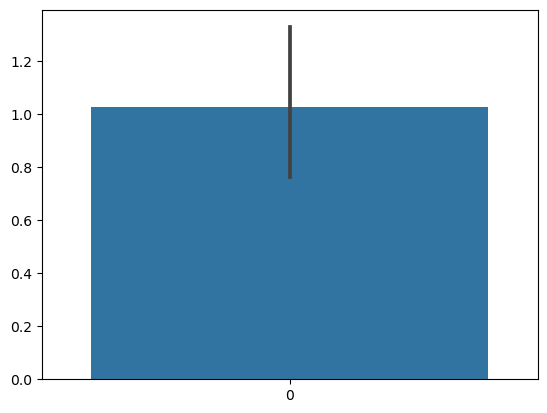

In [709]:
sns.barplot(df.Price)

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
## most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int32  
 6   Type            10839 non-null  float64
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  float64
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), int32(1), object(7)
memory usage: 1.0+ MB


<Axes: ylabel='count'>

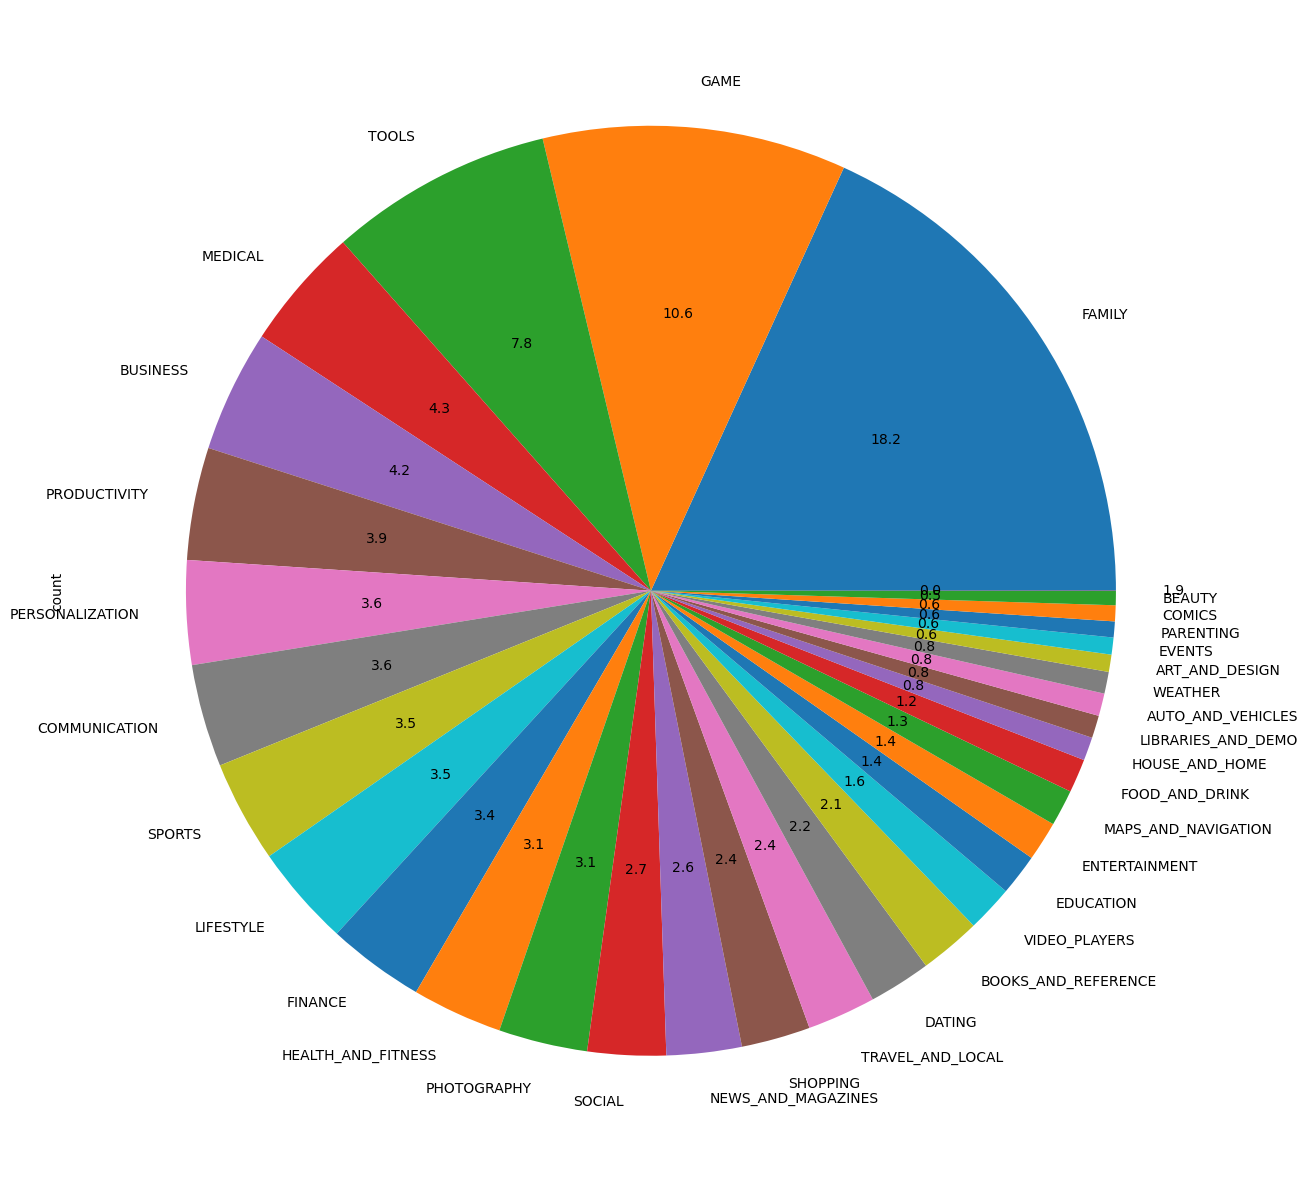

In [718]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,18),autopct='%1.1f')

## Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
## launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int32  
 6   Type            10839 non-null  float64
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  float64
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), int32(1), object(7)
memory usage: 1.0+ MB


In [741]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,0.0,1.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,0.0,1.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,0.0,1.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,0.0,9.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,0.0,1.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [754]:
df.Reviews.str.isnumeric().index

RangeIndex(start=0, stop=10841, step=1)

App Category,Ratings and Reviews, Installs

In [768]:
df[-df['Reviews'].str.isnumeric()].index

Index([10472], dtype='int64')

In [771]:
df.drop(df.index[10472],inplace=True)

<Axes: >

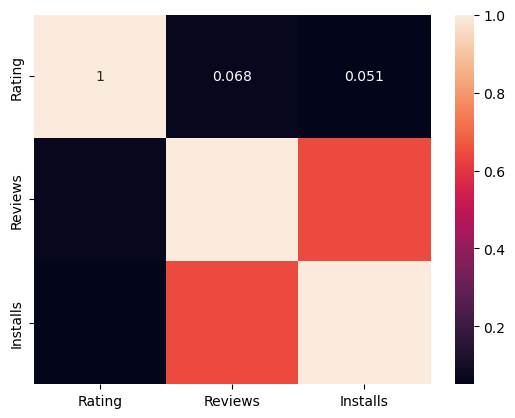

In [775]:
sns.heatmap(df[['Rating','Reviews', 'Installs']].corr(),annot=True)

In [778]:
we can say Reviews and install 60% + correlated

SyntaxError: invalid syntax (1325339138.py, line 1)

In [782]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Day']=df['Last Updated'].dt.day
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year

In [794]:
df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [893]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

<Axes: xlabel='Month', ylabel='Installs'>

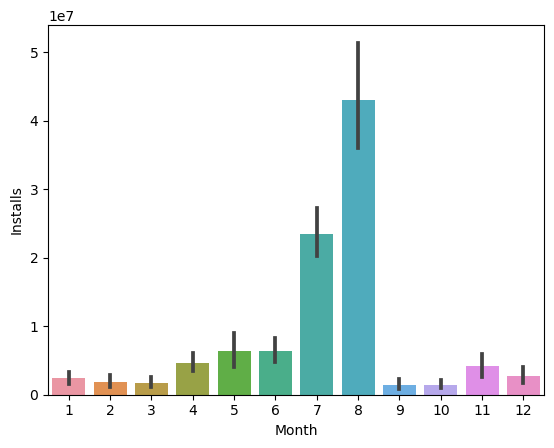

In [913]:
sns.barplot(x=df.Month,y=df.Installs)

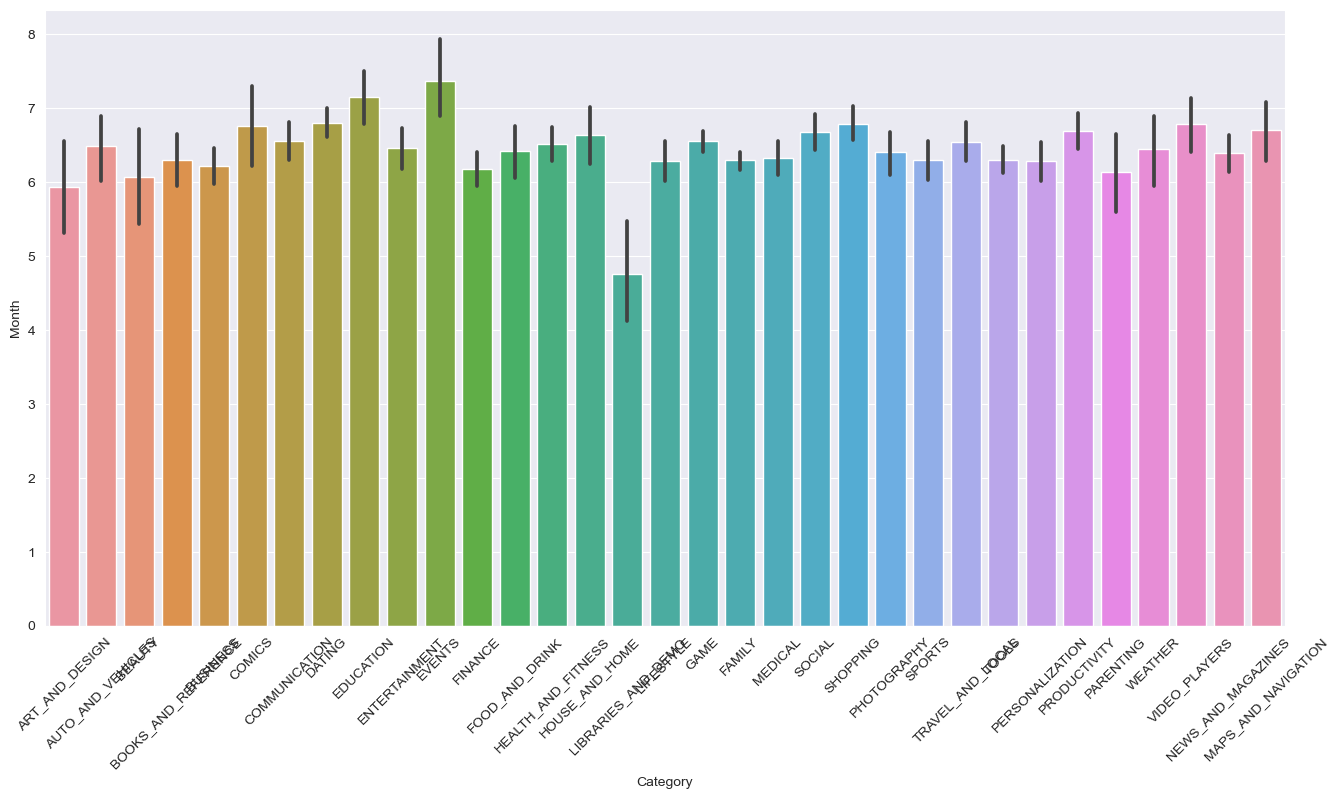

In [935]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(y=df.Month,x=df.Category)
plt.xticks(rotation=45)
plt.show()

In [953]:
user liking Family content app more than any catagory 
Entertanment and dating app are the higest catagory downloded app 

SyntaxError: invalid syntax (321310541.py, line 1)